In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv
/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv


# Objectives of this Project Analysis

1) What factors (features) affect test scores most? (Analysing the demographics of the students and their parents.)

2) Are there interacting features which affect test scores? (Analysing all the different parameters that can influence the test performance of the students.)

# A) Importing and performing EDA on data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/students-exam-scores/Expanded_data_with_more_features.csv')

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.shape

(30641, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


## Displaying the minimum and maximum marks obtained in the different tests.

In [8]:
# Get the summary statistics
stats = df.describe()

# Extract the minimum and maximum values for Math, Reading, and Writing scores
min_max_stats = stats.loc[['min', 'max'], ['MathScore', 'ReadingScore', 'WritingScore']]

# Display the result as a table
print(min_max_stats)

     MathScore  ReadingScore  WritingScore
min        0.0          10.0           4.0
max      100.0         100.0         100.0


In [9]:
from tabulate import tabulate

# Display the result as a formatted table
print(tabulate(min_max_stats, headers='keys', tablefmt='pretty')) #many table formats are there like- pipe, github, simple,pipe,presto

+-----+-----------+--------------+--------------+
|     | MathScore | ReadingScore | WritingScore |
+-----+-----------+--------------+--------------+
| min |    0.0    |     10.0     |     4.0      |
| max |   100.0   |    100.0     |    100.0     |
+-----+-----------+--------------+--------------+


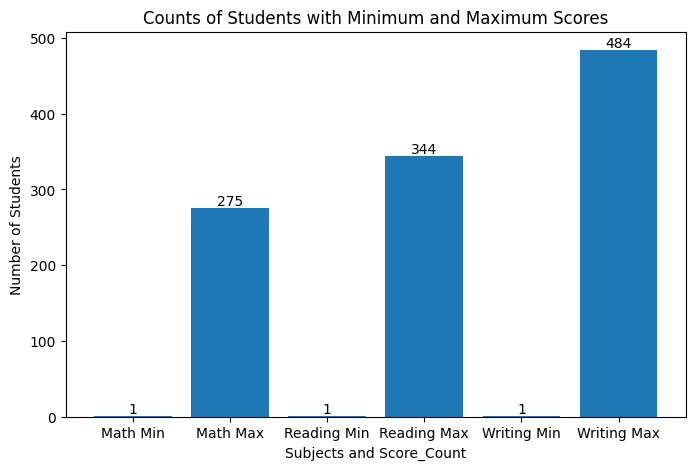

In [10]:
# Find the minimum and maximum values for each subject
min_math = df['MathScore'].min()
max_math = df['MathScore'].max()
min_reading = df['ReadingScore'].min()
max_reading = df['ReadingScore'].max()
min_writing = df['WritingScore'].min()
max_writing = df['WritingScore'].max()

# Count the occurrences of these minimum and maximum values
min_math_count = df[df['MathScore'] == min_math].shape[0]
max_math_count = df[df['MathScore'] == max_math].shape[0]
min_reading_count = df[df['ReadingScore'] == min_reading].shape[0]
max_reading_count = df[df['ReadingScore'] == max_reading].shape[0]
min_writing_count = df[df['WritingScore'] == min_writing].shape[0]
max_writing_count = df[df['WritingScore'] == max_writing].shape[0]

# Create a DataFrame to display these counts
count_stats = pd.DataFrame({
    'Subject': ['Math Min', 'Math Max', 'Reading Min', 'Reading Max', 'Writing Min', 'Writing Max'],
    'Count': [min_math_count, max_math_count, min_reading_count, max_reading_count, min_writing_count, max_writing_count]
})

# Plotting the data
plt.figure(figsize=(8, 5))
plt.bar(count_stats['Subject'], count_stats['Count'])     # we can add color here as well color=['green', 'blue']

# Adding values on top of bars
for i, count in enumerate(count_stats['Count']):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
    


plt.title('Counts of Students with Minimum and Maximum Scores')
plt.xlabel('Subjects and Score_Count')
plt.ylabel('Number of Students')
plt.show()

In [11]:
#count the null values
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# B) Data Transformations

### Drop the Unnamed Column

In [12]:
#dropping the first unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [14]:
#counting the unique values present in the column
unique_values = df['WklyStudyHours'].unique()

# Print the unique values
print(unique_values)

['< 5' '5 - 10' '> 10' nan]


### To detect any outlier

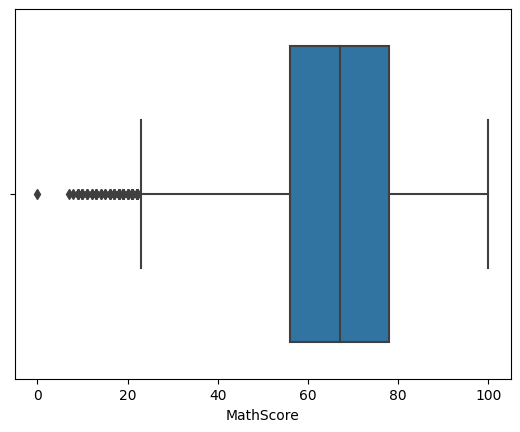

In [15]:
sns.boxplot(data=df, x='MathScore')

plt.show()

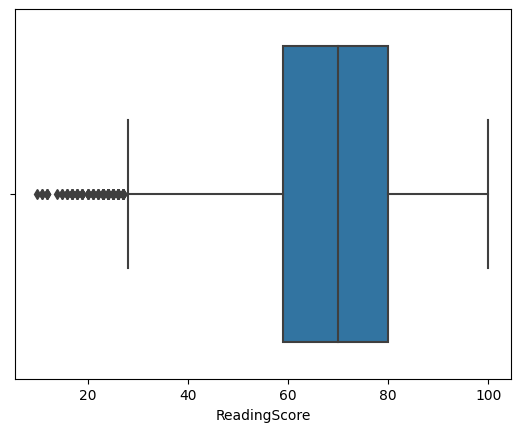

In [16]:
sns.boxplot(data=df, x='ReadingScore')
plt.show()

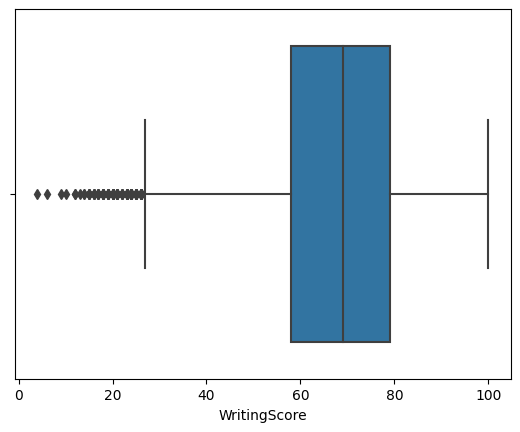

In [17]:
sns.boxplot(data=df, x='WritingScore')
plt.show()

***From the above box plots, we can say that the maximum outlier is seen in the Maths Score, suggesting that high difficulty level of the subject, which needs more effective measures to help the students.***

# C) Data Visualisations

## 1) Gender analysis

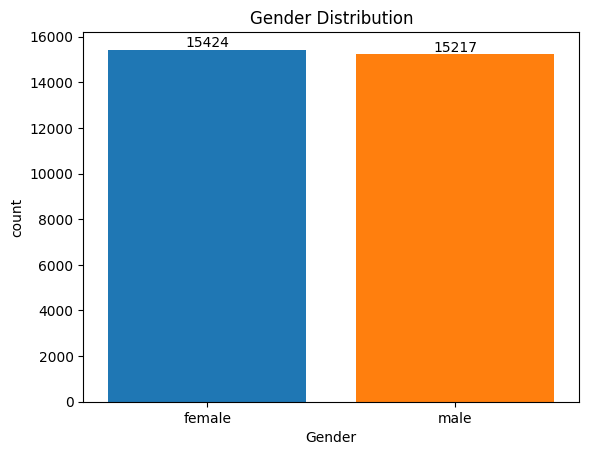

In [18]:
ax=sns.countplot(data=df, x='Gender', saturation=1.0)

#sns.set(rc={'figure.figsize':(5,5)})

# to show the count of respective gender.
ax.bar_label(ax.containers[0])           

#plotting data
plt.title("Gender Distribution")
sns.set_style("white")
ax.grid(False)

plt.show()

***From the above analysis we found that the no. of females is 15424 and that of males is 15217.***

In [19]:
#aggregating scores by grouping Gender
gender = df.groupby('Gender').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(gender)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


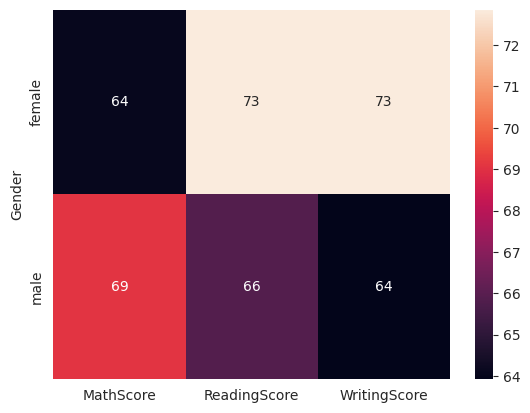

<Figure size 500x500 with 0 Axes>

In [20]:
sns.heatmap(gender, annot = True)
plt.figure(figsize=(5,5))
plt.show()

***From the above analysis we can see that females have much better in Reading and Writing tests than the boys, whereas boys performed better in Maths test.***

## 2) Impact of Parent's Educational level on students'performance

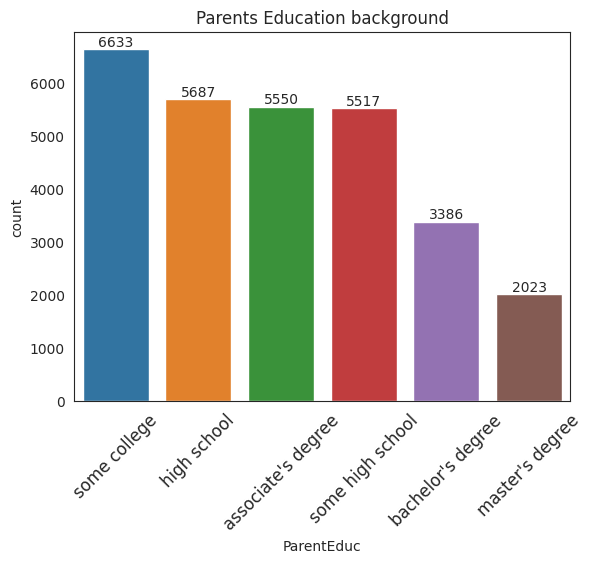

<Figure size 800x500 with 0 Axes>

In [21]:
ax=sns.countplot(x='ParentEduc', data = df, 
              order=['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"])
ax.bar_label(ax.containers[0])
plt.title('Parents Education background')
plt.figure(figsize=(8,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

In [22]:
#aggregating scores by grouping Parents' educational level
parent_edu = df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(parent_edu)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


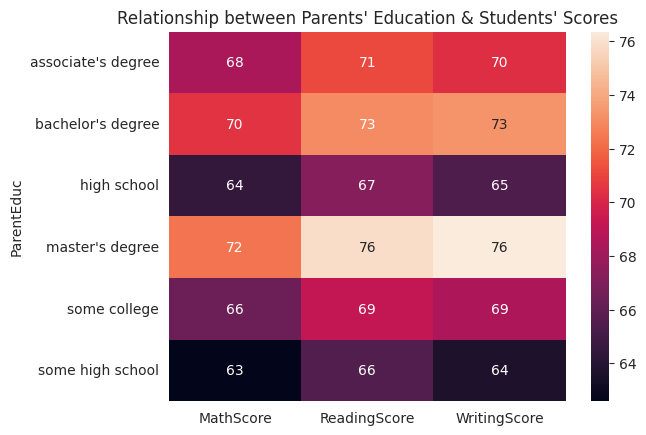

In [23]:
sns.heatmap(parent_edu, annot = True)

plt.title("Relationship between Parents' Education & Students' Scores")
plt.show()

***From the above analysis we can conclude that the educational level of the parents has a significant role to play in their kids' test scores.***

## 3) Impact of parents' marital status on the students' test performance

In [24]:
#aggregating scores by grouping marital status
marital_status = df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(parent_edu)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


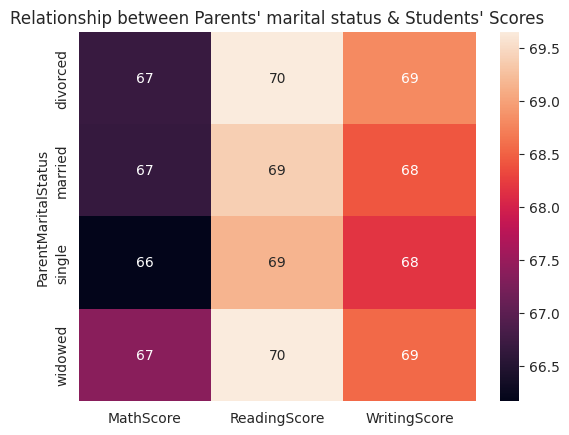

<Figure size 400x400 with 0 Axes>

In [25]:
sns.heatmap(marital_status, annot = True)
plt.title("Relationship between Parents' marital status & Students' Scores")
plt.figure(figsize=(4,4))
plt.show()

***From the above chart we can say that the marital status of parents have negligible impact on the test scores of the students.***

## 4) Analysing the impact of ethnicity on the students' scores.

In [26]:
#Counting different values in ethnic group category
category_counts = df['EthnicGroup'].value_counts(dropna=False)
print(category_counts)

EthnicGroup
group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
NaN        1840
Name: count, dtype: int64


### Ethnic group distribution

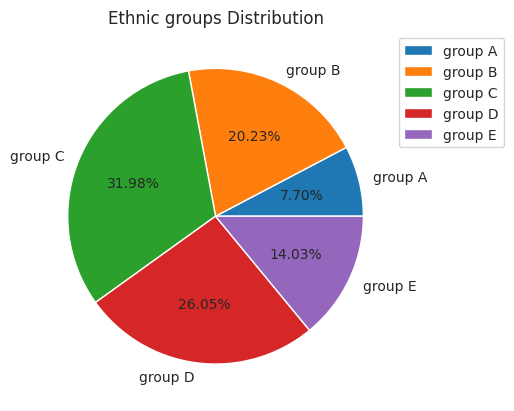

In [27]:
#count the values of ethnic groups in respective categories and then passing it through a list.

groupA = df.loc[(df['EthnicGroup']== 'group A')].count()
groupB = df.loc[(df['EthnicGroup']== 'group B')].count()
groupC = df.loc[(df['EthnicGroup']== 'group C')].count()
groupD = df.loc[(df['EthnicGroup']== 'group D')].count()
groupE = df.loc[(df['EthnicGroup']== 'group E')].count()

l = ['group A','group B', 'group C', 'group D', 'group E']
mlist = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(mlist,labels=l, autopct="%1.2f%%")             # %1.2f%% 1 means padding space between digits which is usually not necessary, .2 signifies the no. of digits after decimal, f means floating point number.

plt.title('Ethnic groups Distribution')
plt.legend(l, loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()


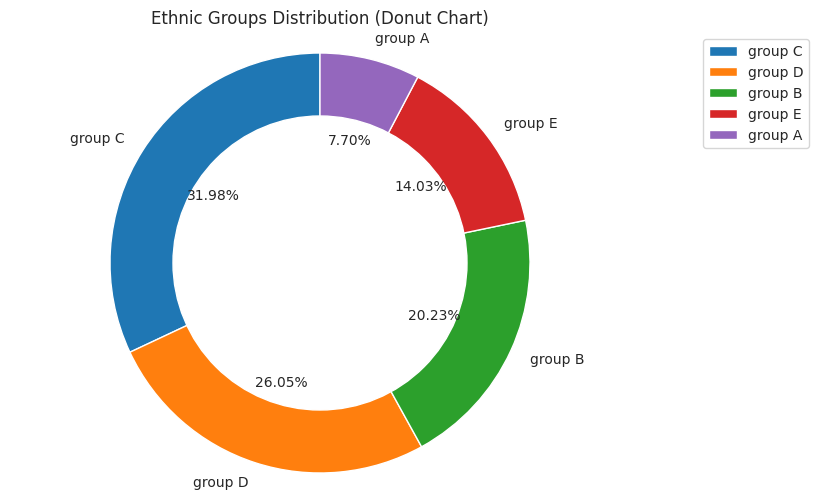

In [28]:

group_counts = df['EthnicGroup'].value_counts()

# Define labels and sizes for the pie chart
labels = group_counts.index
sizes = group_counts.values

# Create the outer pie chart (donut)
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=plt.cm.tab10.colors)
centre_circle = plt.Circle((0,0),0.70,fc='white') # Create a white circle to make it a donut
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle to the plot
plt.title('Ethnic Groups Distribution (Donut Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

In [29]:
#aggregating scores by grouping ethnic group
ethnicity = df.groupby('EthnicGroup').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(ethnicity)

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


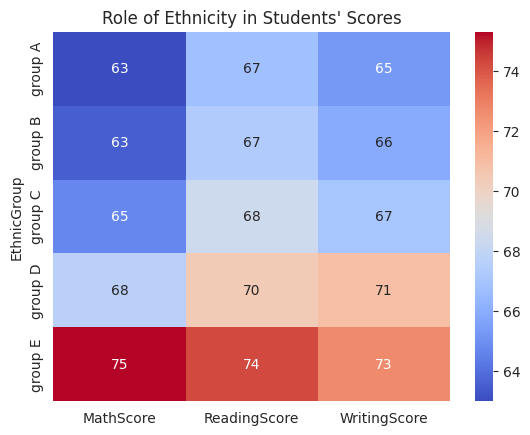

<Figure size 400x400 with 0 Axes>

In [30]:
sns.heatmap(ethnicity, annot = True, cmap='coolwarm')
plt.title("Role of Ethnicity in Students' Scores")
plt.figure(figsize=(4,4))
plt.show()

***From the above 2 graphs we can see that the Group C has the maximum no. of students (31.98%) but the students from Group E (14.03%) have performed much better in the test.***

## 5) Role of Sports Practice in Students' Test performance

In [31]:
#Counting different values in Sports practice group
unique_values = df['PracticeSport'].unique()

# Print the unique values
print(unique_values)

['regularly' 'sometimes' 'never' nan]


In [32]:
#aggregating scores by grouping sports practice
sports = df.groupby('PracticeSport').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(sports)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


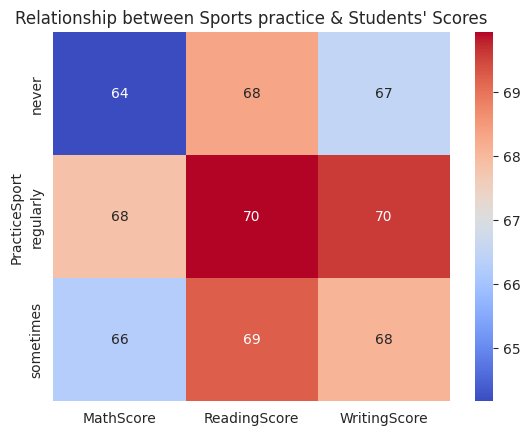

<Figure size 400x400 with 0 Axes>

In [33]:
sns.heatmap(sports, annot = True, cmap='coolwarm')
plt.title("Relationship between Sports practice & Students' Scores")
plt.figure(figsize=(4,4))
plt.show()

***From the above analysis we can see that the students who practice sports regularly or practice sometimes have performed better in analytical subjects (Maths and Writing) as compared to those who do not practice sports at all.***

## 6) Impact of Test Prep in Students' Test Performance

In [34]:
unique_values =df['TestPrep'].unique()
print(unique_values)

['none' nan 'completed']


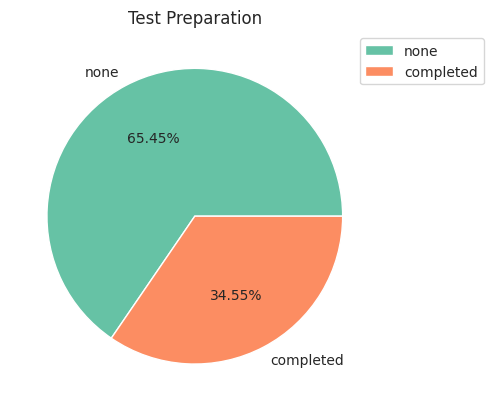

In [35]:
none = df.loc[(df['TestPrep']== 'none')].count()
completed = df.loc[(df['TestPrep']== 'completed')].count()

l=['none', 'completed']

mlist = [none['TestPrep'],completed['TestPrep']]

custom_palette = sns.color_palette("Set2")
custom_colors = custom_palette[:len(mlist)] 
plt.pie(mlist,labels=l, autopct="%1.2f%%", colors=custom_colors)   # %1.2f%% 1 means padding space between digits which is usually not necessary, .2 signifies the no. of digits after decimal, f means floating point number.


plt.title('Test Preparation')
plt.legend(l, loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

In [36]:
#aggregating scores by grouping test prep
test = df.groupby('TestPrep').agg({'MathScore':'mean','ReadingScore':'mean', 'WritingScore':'mean'})
print(test)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed   69.54666     73.732998     74.703265
none        64.94877     67.051071     65.092756


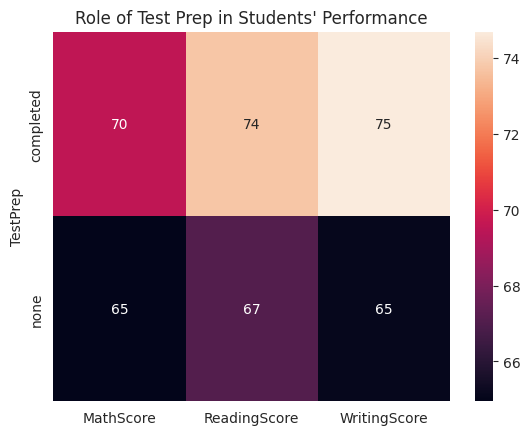

In [37]:
sns.heatmap(test, annot = True)
#plt.figure(figsize=(4,5))
plt.title("Role of Test Prep in Students' Performance")
plt.show()

***From the above analysis we see that 65.45% students have not taken the test prep whereas 34.55% students took test prep. Surprisingly, the students who have taken the test prep have performed much better than the ones who did not take. This suggests that the strategy of Test Preparation has significant role in helping the students to score good marks.***

## 7) Role of Weekly Study Hours in Students' Performance

In [38]:
unique_values = df['WklyStudyHours'].unique()
print(unique_values)

['< 5' '5 - 10' '> 10' nan]


In [39]:
values=df['WklyStudyHours'].value_counts()
print(values)

WklyStudyHours
5 - 10    16246
< 5        8238
> 10       5202
Name: count, dtype: int64


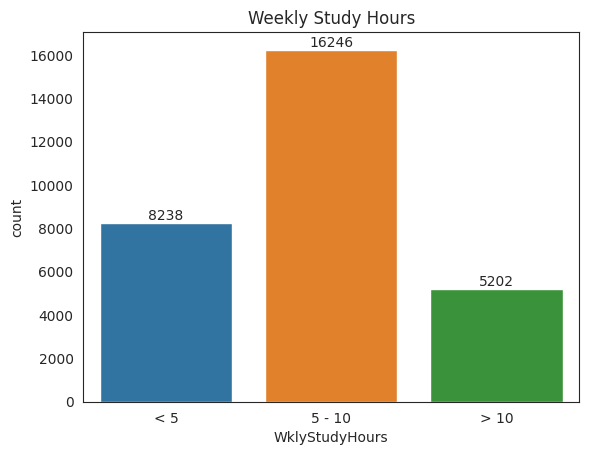

In [40]:
#plotting the values of Weekly study hours
ax = sns.countplot(x = 'WklyStudyHours', data = df)
#plt.figure(figsize=(10,5))
ax.bar_label(ax.containers[0])
plt.title('Weekly Study Hours')
plt.show()

In [41]:
#aggregating scores by grouping weekly study hours
hours = df.groupby('WklyStudyHours').agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
print(hours)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


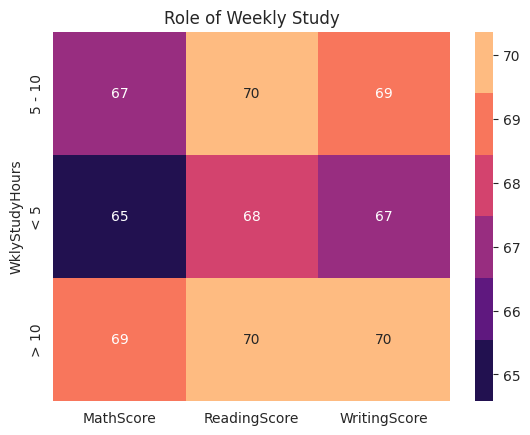

In [42]:
palette = sns.color_palette('magma')
sns.heatmap(hours, annot = True, cmap=palette)
#plt.figure(figsize=(4,5))
plt.title('Role of Weekly Study')
plt.show()

***Further, it is seen here that the students who study 5-10 hours or more than 10 hours have performed decently in their tests.***

## 8) Role of Lunch provided by School to Students in their Test performance

In [43]:
values = df['LunchType'].unique()
print(values)

['standard' 'free/reduced']


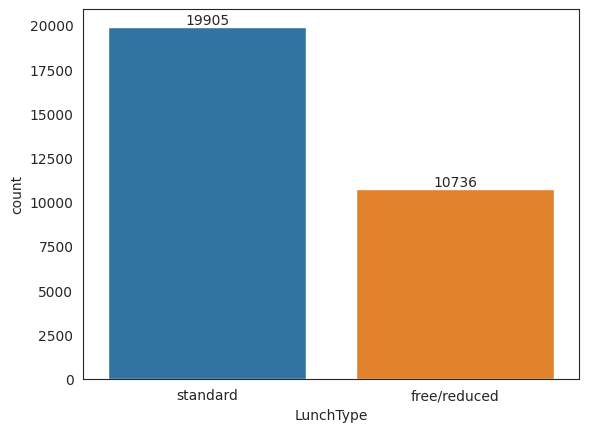

In [44]:
ax = sns.countplot(x='LunchType', data = df)
ax.bar_label(ax.containers[0])
plt.show() 

In [45]:
#aggregating scores by grouping lunch provision
lunch = df.groupby('LunchType').agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
print(lunch)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


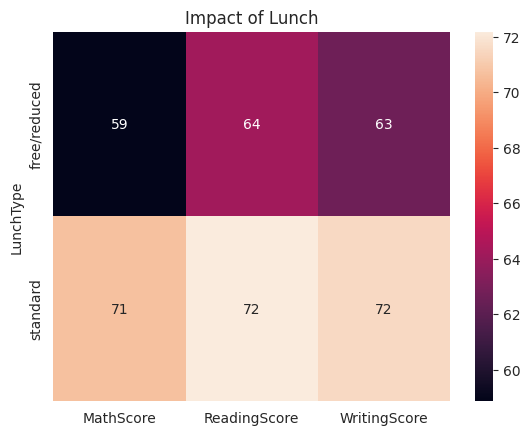

In [46]:
sns.heatmap(lunch, annot = True)
plt.title('Impact of Lunch')
plt.show()

***From the above chart we can see that the students receiving standard meals from school have performed comparatively much better than the ones who got free or reduced meals.***

## 9) Role of Transport in Students' Scores

In [47]:
values = df['TransportMeans'].unique()
print(values)

['school_bus' nan 'private']


In [48]:
#aggregating scores by grouping transport means
transport = df.groupby('TransportMeans').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(transport)

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.511354     69.472364     68.509593
school_bus      66.674636     69.446206     68.492351


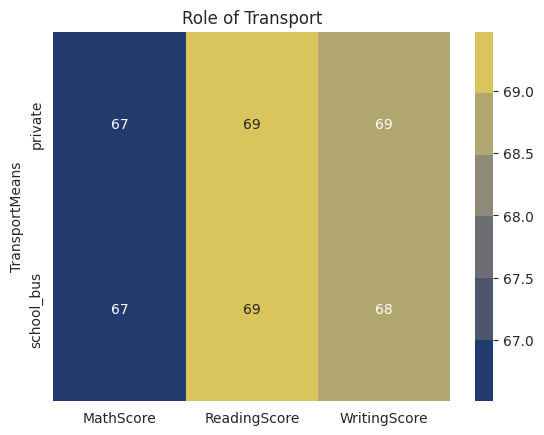

In [49]:
custom_palette = sns.color_palette("cividis")
sns.heatmap(transport, annot = True, cmap=custom_palette)
plt.title('Role of Transport')
plt.show()

***Here, we can see that the transport means as such has no impact on the Students' performance in their tests.***

## 10) Impact of having siblings

In [50]:
#aggregating scores by grouping siblings count
siblings = df.groupby(['NrSiblings']).agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(siblings)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.819449     69.547812     68.746515
1.0         66.473896     69.259097     68.245345
2.0         66.554934     69.472018     68.522533
3.0         66.719092     69.488159     68.650498
4.0         66.245495     69.144169     68.073444
5.0         66.630303     69.453788     68.282576
6.0         65.917219     68.801325     67.860927
7.0         67.615120     69.828179     68.986254


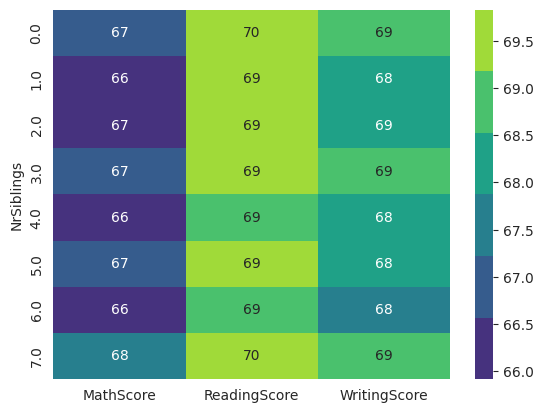

In [51]:
custom_palette = sns.color_palette("viridis")
sns.heatmap(siblings, annot = True, cmap=custom_palette)
plt.show()

***Mostly all the kids who either have any siblings or not, they have performed very well in their Reading, followed by Writing and lastly in their Maths tests.***

## 11) Is there any benefit of being a first born? 

In [52]:
first_child = df.groupby('IsFirstChild').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(first_child)

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


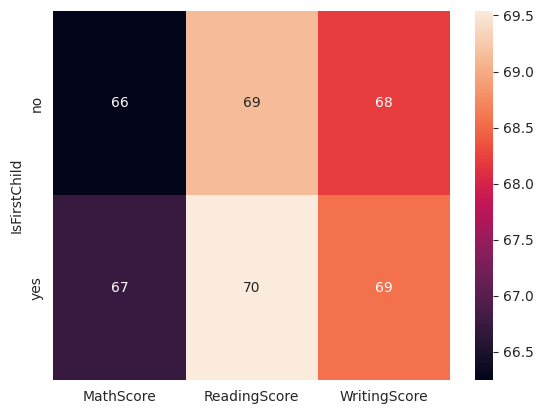

In [53]:
sns.heatmap(first_child, annot = True)
plt.show()

***There is no significant difference in the test scores on the basis that whether the kid is first born or not.***

# Conclusion

-	Kids whose parents have Masters’ degrees and are from Group E ethnic group have performed well.

-	Regular sports practice, test preps, lunch, and weekly study hours are the influencing factors in affecting kids’ test scores.

-	Parents’ marital status, transport means, no. of siblings have negligible impact on students’ performance.
